#KUMAL_KBD_ACT_PERT 2





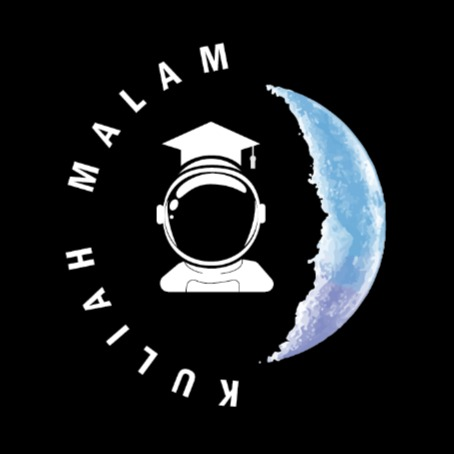

In [ ]:
# LOGO KUMAL
from IPython.display import Image
Image('kumal.jpg')

#TUGAS

## Instruksi Praktikum

1. Silahkan modifikasi kode operasi yang ada menggunakan library perhitungan berbasis GPU (Library Cupy)
2. Bacalah dataset yang berada tersimpan url https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv
3. Periksa dataset apakah terdapat data yang bernilai null dengan menggunakan fungsi .isnull()
4. Buatlah sebuah histogram dari data kolom 'strength'.
5. Buatlah diagram boxplot dari dataset yang ada.
6. Hitung karakteristik statistik (standar deviasi, variance, mean, median) dari masing-masing kolom data.
7. Buatlah correlation map dari dataset tersebut.
8. Hitung covariance dari kolom data yang diminta
9. Hitung pearson correlation dan spearsman correlation dari kolom data yang diminta
10. Hitung nilai hipotesis testing untuk kolom age dan strength.

##2. Bacalah dataset yang berada tersimpan url https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv

In [ ]:
# BERFUNGSI IMPORT LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from scipy import stats
plt.style.use("ggplot")
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [ ]:
# MEMBACA DATA DARI LINK
url_data = "https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv"
data = pd.read_csv(url_data)

In [ ]:
## MENAMPILKAN OUTPUT 5 BARIS AWAL
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


##3.Periksa dataset apakah terdapat data yang bernilai null dengan menggunakan fungsi .isnull()

In [ ]:
# MENAMPILKAN DIMENSI DATASET
print('Shape dataset', data.shape)

Shape dataset (1030, 9)


In [ ]:
# MENAMPILKAN KOLOM DATASET
print(data.columns)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')


In [ ]:
# MENAMPILKAN DATASET APAKAH BERNILAI NULL DENGAN MENGUNAKAN FUNGSI .ISNNULL()
print("mean stength :",data['strength'].isnull())

mean stength : 0       False
1       False
2       False
3       False
4       False
        ...  
1025    False
1026    False
1027    False
1028    False
1029    False
Name: strength, Length: 1030, dtype: bool


##4.Buatlah sebuah histogram dari data kolom 'strength'.

(array([0.00217712, 0.00399138, 0.01015989, 0.01269986, 0.02104548,
        0.01451412, 0.01088559, 0.01814265, 0.02757683, 0.01596553,
        0.01995692, 0.02975395, 0.01814265, 0.03047966, 0.02249689,
        0.01850551, 0.012337  , 0.00979703, 0.01451412, 0.01269986,
        0.00907133, 0.00798277, 0.00507994, 0.00580565, 0.00580565,
        0.00362853, 0.00362853, 0.00181427, 0.00362853, 0.00145141]),
 array([ 2.33      ,  5.00566667,  7.68133333, 10.357     , 13.03266667,
        15.70833333, 18.384     , 21.05966667, 23.73533333, 26.411     ,
        29.08666667, 31.76233333, 34.438     , 37.11366667, 39.78933333,
        42.465     , 45.14066667, 47.81633333, 50.492     , 53.16766667,
        55.84333333, 58.519     , 61.19466667, 63.87033333, 66.546     ,
        69.22166667, 71.89733333, 74.573     , 77.24866667, 79.92433333,
        82.6       ]),
 <a list of 30 Patch objects>)

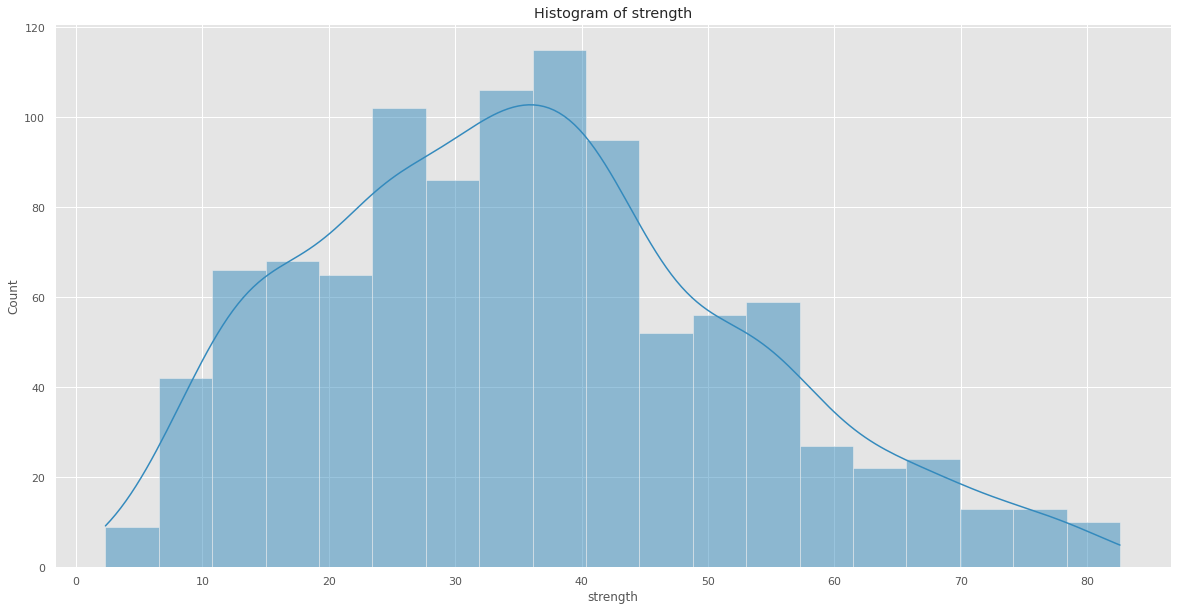

In [ ]:
## HISTOGRAM DATA KOLOM STRENGTH
plt.figure(figsize=(20,10))
plt.title('Histogram of strength')
sns.histplot(data,x='strength',kde=True)
plt.hist(data['strength'], density=True, bins=30, label="Data")

##5. Buatlah diagram boxplot dari dataset yang ada.

In [ ]:
# HISTOGRAM STREGH
q1 = data[["strength"]].quantile(0.35)
q2 = data[["strength"]].quantile(0.85)
iqr = q2 -q1
print(iqr)

strength    26.099
dtype: float64


<Figure size 1080x720 with 0 Axes>

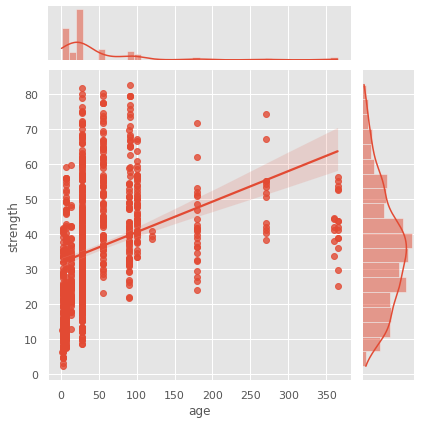

In [ ]:
# HUBUNGAN KOLOM STRENGHT , AGE BOXBLOT
plt.figure(figsize = (15,10))
sns.jointplot(data.age,data.strength,kind="reg")
plt.show()

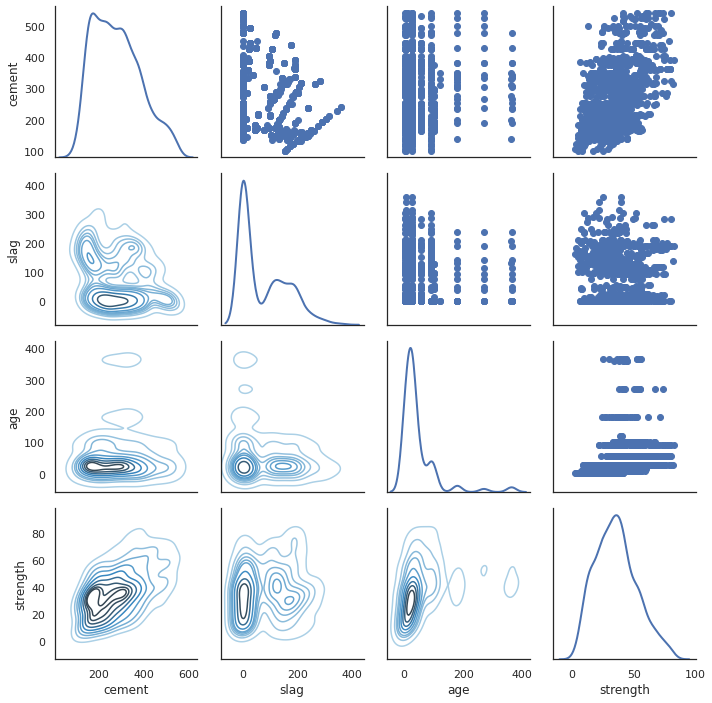

In [ ]:
# HUBUNGAN ANTAR DATA 'cement', 'slag', 'age', dan 'strengh'
sns.set(style = "white")
df = data.loc[:,["cement","slag","age","strength"]]
g = sns.PairGrid(df,diag_sharey = False)
g.map_lower(sns.kdeplot,cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw = 2)
plt.show()

##6. Hitung karakteristik statistik (standar deviasi, variance, mean, median) dari masing-masing kolom data.

In [ ]:
# MENGHITUNG NILAI KARAKTERISTIK MASING KOLOM DENGAN PERINTAH DESCRIBE
print("standart deviation :", data.strength.std())
print("variance           :", data.strength.var())
print("mean               :", data.strength.mean())
print("mdian              :", data.strength.median())

standart deviation : 16.70574196191251
variance           : 279.08181449800435
mean               : 35.81796116504854
mdian              : 34.445


##7. Buatlah correlation map dari dataset tersebut.

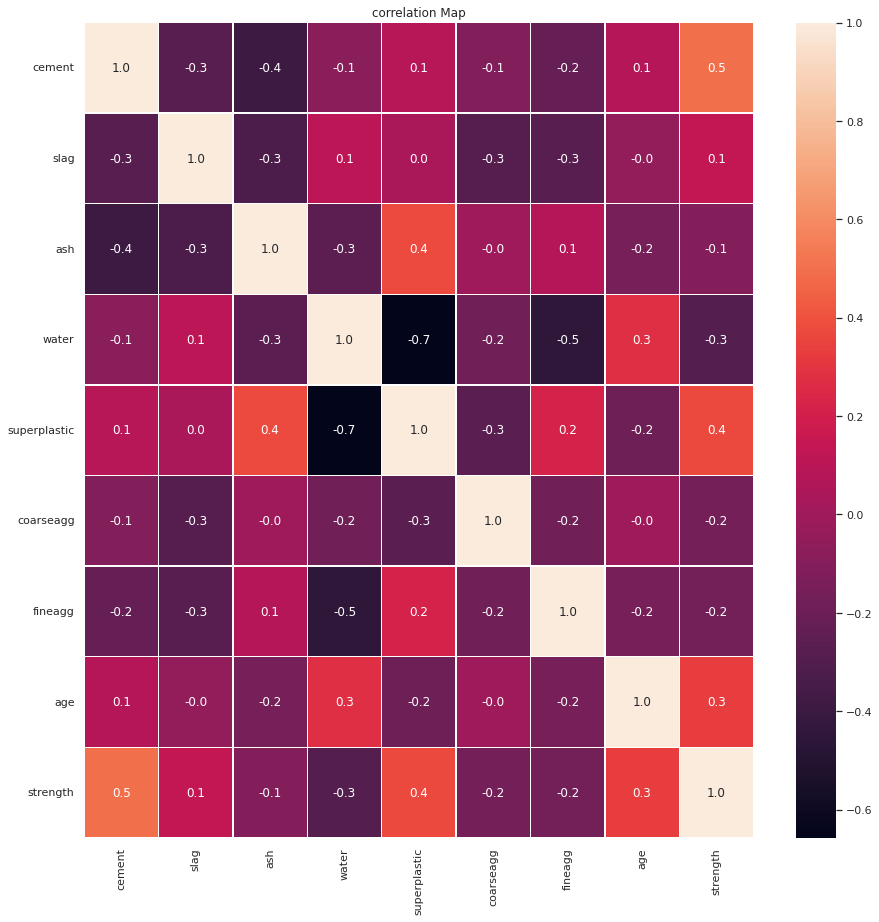

In [ ]:
# Buatlah diagram heatmap dari setiap kolom yang ada dengan library seaborn
f,ax=plt.subplots(figsize = (15,15))
sns.heatmap(data.corr(),annot= True,linewidths=0.5,fmt = ".1f" ,ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('correlation Map')
plt.savefig('graph.png')
plt.show()

##8. Hitung covariance dari kolom data yang diminta

In [ ]:
# Bandingkan nilai covariance dari data age, strength dan strength dan cement
print("Covariance diantara radius mean dan area mean: ",data.strength.cov(data.age))
print("Covariance diantara radius mean dan fractal dimension se: ",data.strength.cov(data.cement))

Covariance diantara radius mean dan area mean:  347.05975751743136
Covariance diantara radius mean dan fractal dimension se:  869.1430218800419


#9. Hitung pearson correlation dan spearsman correlation dari kolom data yang diminta

In [ ]:
# PEARSON CORRELATION
p1 = data.loc[:,["age","strength"]].corr(method= "pearson")
p2 = data.strength.cov(data.age)/(data.strength.std()*data.age.std())
print('Pearson correlation: ')
print(p1)
print('Pearson correlation: ' ,p2)

Pearson correlation: 
               age  strength
age       1.000000  0.328873
strength  0.328873  1.000000
Pearson correlation:  0.3288730007799859


In [ ]:
# SPEARMAN'S CORRELATION 
ranked_data = data.rank()
spearman_corr = ranked_data.loc[:,["age","strength"]].corr(method= "pearson")
print("Spearman's correlation: ")
print(spearman_corr)

Spearman's correlation: 
               age  strength
age       1.000000  0.596028
strength  0.596028  1.000000


##10. Hitung nilai hipotesis testing untuk kolom age dan strength.

In [ ]:
# MENAMPILKAN NILAI HIPOTESIS
statistic, p_value = stats.ttest_rel(data.age,data.strength)
print('HIPOTESIS AGE DAN STRENGHT adalah: ',p_value)

HIPOTESIS AGE DAN STRENGHT adalah:  1.5453117192089214e-07
